In [1]:
import numpy as np
import pandas as pd


In [54]:
# Raw data
features = pd.read_csv('Data/data.csv')
labels = pd.read_csv('Data/target.csv')
# Even spread of boxing vs non boxing (1-2)
#features = pd.read_csv('Data/data_even.csv')
#labels = pd.read_csv('Data/target_even.csv')
feature_names = pd.read_csv('Data/feature_names.csv')
label_names = ['Boxing','Not Boxing']

labels = np.ravel(labels.as_matrix(columns=None))
feature_names = np.ravel(feature_names.as_matrix(columns=None))
features = features.as_matrix(columns=None)
type(features)

numpy.ndarray

In [59]:
print(labels.shape)
print(feature_names.shape)
print(features.shape)
feature_names

(332261,)
(51,)
(332261, 51)


array(['Pelvis_x', 'R_Hip_x', 'R_Leg_x', 'R_Foot_x', 'L_Hip_x', 'L_Leg_x',
       'L_Foot_x', 'Belly_x', 'Thorax_x', 'Neck_x', 'Head_x',
       'L_Shoulder_x', 'L_Arm_x', 'L_Hand_x', 'R_Shoulder_x', 'R_Arm_x',
       'R_Hand_x', 'Pelvis_y', 'R_Hip_y', 'R_Leg_y', 'R_Foot_y',
       'L_Hip_y', 'L_Leg_y', 'L_Foot_y', 'Belly_y', 'Thorax_y', 'Neck_y',
       'Head_y', 'L_Shoulder_y', 'L_Arm_y', 'L_Hand_y', 'R_Shoulder_y',
       'R_Arm_y', 'R_Hand_y', 'Pelvis_z', 'R_Hip_z', 'R_Leg_z',
       'R_Foot_z', 'L_Hip_z', 'L_Leg_z', 'L_Foot_z', 'Belly_z',
       'Thorax_z', 'Neck_z', 'Head_z', 'L_Shoulder_z', 'L_Arm_z',
       'L_Hand_z', 'R_Shoulder_z', 'R_Arm_z', 'R_Hand_z'], dtype=object)

In [56]:
# Look at our data
print(label_names)
print(labels[0])
print(feature_names[0])
print(features[0])

['Boxing', 'Not Boxing']
0
Pelvis_x
[ 6.6427e+02  6.6682e+02  6.9485e+02  1.1072e+03  6.6173e+02  6.9584e+02
  1.1202e+03  5.1934e+02  3.5262e+02  2.9039e+02  2.5337e+02  3.3583e+02
  2.4168e+02  1.5399e+02  3.8646e+02  3.4357e+02  3.2557e+02 -1.3538e+05
 -1.3540e+05 -1.3538e+05 -1.3517e+05 -1.3536e+05 -1.3536e+05 -1.3525e+05
 -1.3543e+05 -1.3547e+05 -1.3549e+05 -1.3549e+05 -1.3545e+05 -1.3554e+05
 -1.3543e+05 -1.3549e+05 -1.3554e+05 -1.3567e+05  1.5274e+02  1.6895e+02
  5.9839e+02  8.9412e+02  1.3652e+02  5.3829e+02  8.7406e+02 -1.2664e+02
 -4.3981e+02 -3.7290e+02 -4.1330e+02 -4.3901e+02 -5.5968e+02 -5.9285e+02
 -4.0042e+02 -2.4982e+02 -3.0062e+02]


In [57]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.15)

In [58]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(train, train_labels)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [60]:
# Make predictions
preds = clf.predict(test)

In [61]:
np.sum(test_labels)/test_labels.shape[0]
test_boxing = test_labels[np.where(test_labels==1)]
features_boxing = features[np.where(test_labels==1)][:]
print(test_boxing.shape)
print(features_boxing.shape)

(11111,)
(11111, 51)


In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Evaluate accuracy
print('Accuracy = {}'.format(accuracy_score(test_labels, preds)))
# Evaluate precision
print('Precision = {}'.format(precision_score(test_labels, preds)))
# Evaluate recall
print('Recall = {}'.format(recall_score(test_labels, preds)))
# Evaluate f1
print('f1 score = {}'.format(f1_score(test_labels, preds)))

Accuracy = 0.5123394863563403
Precision = 0.2525877587758776
Recall = 0.6061560615606156
f1 score = 0.3565850430178689


In [63]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_labels,preds))

[[18800 19929]
 [ 4376  6735]]


In [64]:
print(classification_report(test_labels,preds))

             precision    recall  f1-score   support

          0       0.81      0.49      0.61     38729
          1       0.25      0.61      0.36     11111

avg / total       0.69      0.51      0.55     49840



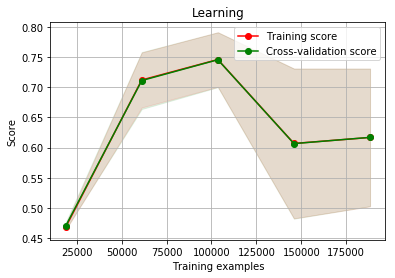

In [65]:
#plot Learning curve
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import learning_curve
plt.figure()
plt.title('Learning')
ylim = None
if ylim is not None:
    plt.ylim(*ylim)
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(
    clf, train, train_labels, cv=None, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")